In [1]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
import pandas as pd
from sklearn.metrics import r2_score
from keras import backend as K
from platypus import SMPSO, Problem, Real, NSGAII, MOEAD
import pickle
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from sklearn.ensemble import RandomForestRegressor


In [4]:
from problem import RentSaleTBE
import visualization 


In [5]:
rent_model = pickle.load(open('../model_creation/outputs/rent_models/randforest_search.pkl', 'rb'))
sale_model = pickle.load(open('../model_creation/outputs/sale_models/randforest_search.pkl', 'rb'))

In [37]:
problem = RentSaleTBE(rent_model, sale_model)

algorithm = SMPSO(problem, log_frequency=100)
algorithm.run(5000)

In [38]:
print(algorithm.result[0])
print(algorithm.result[0].objectives)

Solution[364.97175869531316,1.5127804724660068,1.4939817239722568,11368.0,17302.2885118484|-1269.290111111111,79941.5,62.98126748188468|0]
[-1269.290111111111, 79941.5, 62.98126748188468]


In [39]:
objectives = [list(row.objectives) for row in algorithm.result]
parameters = [list(row.variables) for row in algorithm.result]

In [40]:
objectives = pd.DataFrame(objectives, columns=['rental', 'sale', 'TBE'])
objectives['rental'] = -1*objectives['rental']
parameters = pd.DataFrame(parameters, columns=['sqfeet','beds','baths','income','density'])
parameters['beds'] = parameters['beds'].astype(int)
parameters['baths'] = parameters['baths'].astype(int)

In [41]:
optimized_data = pd.concat([parameters, objectives], axis=1)

In [42]:
optimized_data

,sqfeet,beds,baths,income,density,rental,sale,TBE
0,364.971759,1,1,11368.000000,17302.288512,1269.290111,79941.500000,62.981267
1,991.567809,3,1,131177.204918,63534.669480,3904.336000,934383.715293,239.319494
2,591.118442,1,2,15599.617805,20561.874814,1856.523905,87928.500000,47.361900
3,1005.143692,5,4,57564.648525,23476.652839,3067.721571,383930.500000,125.151677
4,785.652709,2,1,159704.725353,57472.981905,3653.776000,748699.112855,204.911060
5,830.832227,1,1,158603.050945,18763.579997,3114.709752,482604.028902,154.943499
6,1444.604379,2,2,11368.000000,18110.267814,3034.692000,239542.981320,78.934858
7,567.921740,1,1,11368.000000,34532.534778,2101.484571,152524.995000,72.579641
8,696.178938,2,1,19334.331008,45073.294457,2726.653067,152703.900850,56.004155
9,890.007735,1,1,166985.028231,14890.056762,3608.892095,525675.990447,145.661321


In [43]:
optimized_data.describe()

,sqfeet,beds,baths,income,density,rental,sale,TBE
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,863.581138,1.800000,1.35000,99856.164172,42448.450919,3125.837216,506195.490379,147.058973
std,233.853110,1.056309,0.74516,69068.551958,26903.356379,781.570889,313291.886804,71.042767
min,364.971759,1.000000,1.00000,11368.000000,14890.056762,1269.290111,79941.500000,47.361900
25%,763.284266,1.000000,1.00000,15652.787184,18665.253324,2748.949517,197921.187712,76.099588
50%,893.595273,1.500000,1.00000,136961.637955,29004.593808,3361.800924,504140.009674,145.621749
75%,932.360787,2.000000,1.25000,158584.217203,67268.504019,3729.232000,790058.579937,211.850980
max,1444.604379,5.000000,4.00000,178002.382963,83878.513359,3904.336000,934383.715293,239.319494


(<Figure size 504x360 with 1 Axes>,
 <AxesSubplot:xlabel='Rent price', ylabel='Sale price'>)

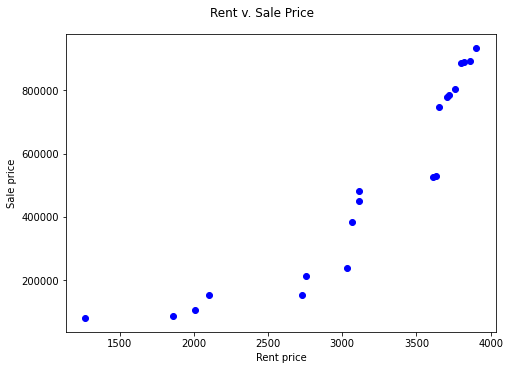

In [44]:
visualization.plot_pareto_front(optimized_data, "Rent v. Sale Price")

(<Figure size 1800x720 with 10 Axes>,
 array([[<AxesSubplot:xlabel='sqfeet', ylabel='beds'>,
         <AxesSubplot:xlabel='sqfeet', ylabel='income'>,
         <AxesSubplot:xlabel='beds', ylabel='baths'>,
         <AxesSubplot:xlabel='beds', ylabel='density'>,
         <AxesSubplot:xlabel='baths', ylabel='density'>],
        [<AxesSubplot:xlabel='sqfeet', ylabel='baths'>,
         <AxesSubplot:xlabel='sqfeet', ylabel='density'>,
         <AxesSubplot:xlabel='beds', ylabel='income'>,
         <AxesSubplot:xlabel='baths', ylabel='income'>,
         <AxesSubplot:xlabel='income', ylabel='density'>]], dtype=object))

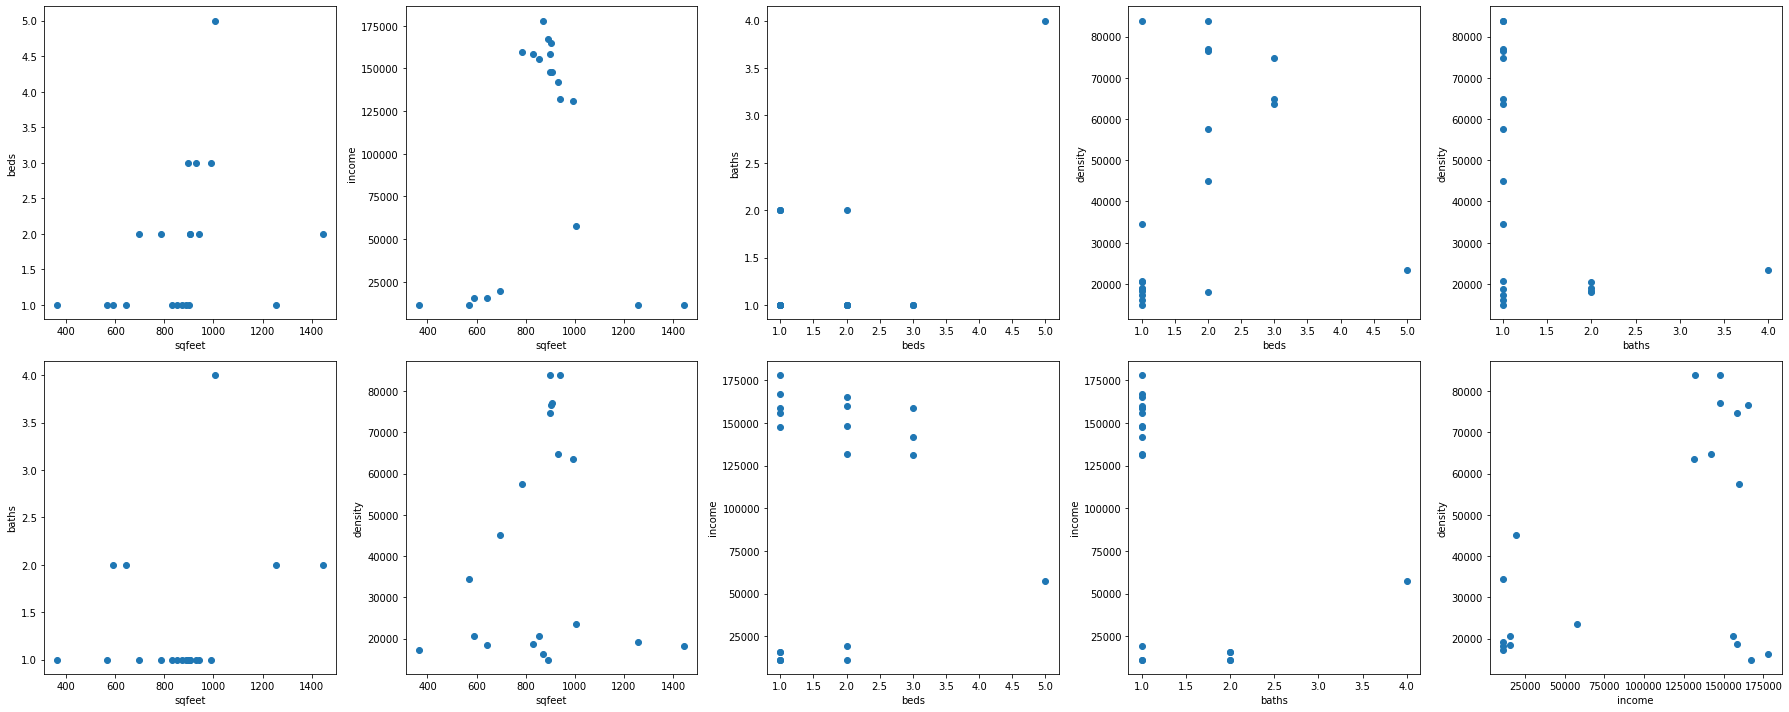

In [45]:
visualization.plot_input_distributions(optimized_data)

In [46]:
optimized_data.to_csv('./outputs/rent_sale_tbe/smpso.csv')